In [1]:
from PIL import Image, ImageOps, ImageDraw
from scipy import fftpack, ndimage
import numpy as np
from imageio import imread
from matplotlib import pyplot as plt

Gfiltstrength = 300
FTfiltstrength = 200
hpfiltstrength = 200

labim = Image.open('imagegs.jpg')
labimhigh = Image.open('imagegs.jpg')
labimlow = Image.open('imagegs.jpg')

im = Image.open('imagegs.jpg')

bigsize = (im.size[0] * 1, im.size[1] * 1) 
mask = Image.new('L', bigsize, 255) #change 3rd argument to 0 to perform circular crop
draw = ImageDraw.Draw(mask) 
draw.ellipse((0, 0) + bigsize, fill=255)
mask = mask.resize(im.size, Image.ANTIALIAS)
im.putalpha(mask)
imgin = ImageOps.fit(im, mask.size, centering=(0.5, 0.5))
imgin.putalpha(mask)

background = Image.new('L', im.size, color=0)
background.paste(im, im)
imgarr = np.asarray(background)

# Build and apply a Gaussian filter.
ncols, nrows = (im.size[0], im.size[1])
sigmax, sigmay = Gfiltstrength, Gfiltstrength
cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))


multp = imgarr * gmask
# plt.imshow(np.abs(multp), cmap='gray')
# plt.show()

f = np.fft.fft2(multp, norm='ortho')
# f[0,0] = 0 #remove DC
fshift = np.fft.fftshift(f)

ftim = Image.fromarray(np.abs(fshift).astype(np.uint8))


########### filtering
# ftbackground = Image.new('L', im.size, color=0)
# ftbackground.paste(ftim, ftim)
# ftarr = np.asarray(background)

ncols, nrows = (im.size[0], im.size[1])
ftsigmax, ftsigmay = FTfiltstrength, FTfiltstrength
ftcy, ftcx = nrows/2, ncols/2
ftx = np.linspace(0, nrows, nrows)
fty = np.linspace(0, ncols, ncols)
ftX, ftY = np.meshgrid(ftx, fty)
ftmask = np.exp(-(((ftX-ftcx)/ftsigmax)**2 + ((ftY-ftcy)/ftsigmay)**2))
ftimgin = fshift * ftmask
plotftimgin = np.abs(ftimgin).astype(np.uint8)

imagep = np.fft.ifft2(ftimgin)
plotimagep = np.abs(imagep)

################## high pass filtering
ncols, nrows = (im.size[0], im.size[1])
hpsigmax, hpsigmay = hpfiltstrength, hpfiltstrength
hpcy, hpcx = nrows/2, ncols/2
hpx = np.linspace(0, nrows, nrows)
hpy = np.linspace(0, ncols, ncols)
hpX, hpY = np.meshgrid(hpx, hpy)
hpmask = (np.exp(-(((hpX-hpcx)/hpsigmax)**2 + ((hpY-hpcy)/hpsigmay)**2))-1)
hpimgin = fshift * hpmask
plothpimgin = np.abs(hpimgin).astype(np.uint8)

hpimagep = np.fft.ifft2(hpimgin)
plothpimagep = np.abs(hpimagep)
###################

power = (np.abs(fshift).astype(np.uint8))**2
magnitude_spectrum = np.abs(fshift).astype(np.uint8)
phase = np.angle(fshift).astype(np.uint8)


l1, l2, font, s1, s2, padding = 3.0, 10.0, 25.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)
    
    
plt.subplot(121), plt.imshow(multp, cmap = 'gray')
plt.title('Aperture Function'), plt.xticks([]), plt.yticks([])
# plt.title('Input Image')

plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Digital Fourier Transform'), plt.xticks([]), plt.yticks([])
# plt.title('Magnitude Spectrum')

plt.show()

l1, l2, font, s1, s2, padding = 3.0, 10.0, 25.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)

plt.subplot(121),plt.imshow(plotftimgin, cmap = 'gray')
plt.title('Filtered Magnitude Spectrum (LP)'), plt.xticks([]), plt.yticks([])
# plt.title('Power Spectrum')

plt.subplot(122),plt.imshow(plotimagep, cmap='gray')
plt.title('Reconstruction (LP)'), plt.xticks([]), plt.yticks([])
# plt.title('Phase Spectrum')
plt.show()

l1, l2, font, s1, s2, padding = 3.0, 10.0, 25.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)

plt.subplot(121),plt.imshow(plothpimgin, cmap = 'gray')
plt.title('Filtered Magnitude Spectrum (HP)'), plt.xticks([]), plt.yticks([])
# plt.title('Power Spectrum')

plt.subplot(122),plt.imshow(plothpimagep, cmap='gray')
plt.title('Reconstruction (HP)'), plt.xticks([]), plt.yticks([])
# plt.title('Phase Spectrum')
plt.show()
    
    
# plt.subplot(121),plt.imshow(power, cmap = 'gray')
# plt.title('Power Spectrum'), plt.xticks([]), plt.yticks([])
# # plt.title('Power Spectrum')

# plt.subplot(122),plt.imshow(phase, cmap='gray')
# plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])
# # plt.title('Phase Spectrum')
# plt.show()


In [2]:
len(np.asarray(labim))
len(multp)

960

(Text(0.5,1,'Observed Fourier Transform'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

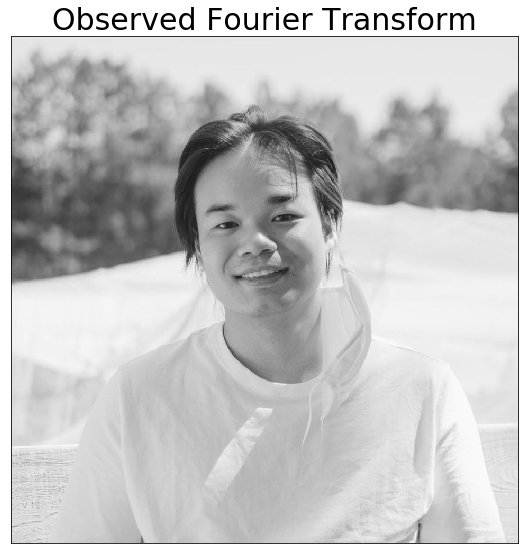

In [3]:
l1, l2, font, s1, s2, padding = 3.0, 10.0, 25.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)

plt.subplot(121), plt.imshow(labim, cmap = 'gray')
plt.title('Observed Fourier Transform'), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'Aperture Function'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

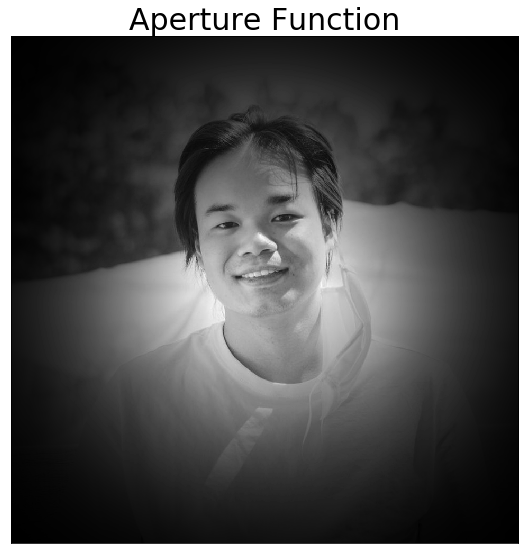

In [4]:
l1, l2, font, s1, s2, padding = 3.0, 10.0, 25.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)

plt.subplot(121), plt.imshow(multp, cmap = 'gray')
plt.title('Aperture Function'), plt.xticks([]), plt.yticks([])

Text(0.5,1,'Digital Fourier Transform')

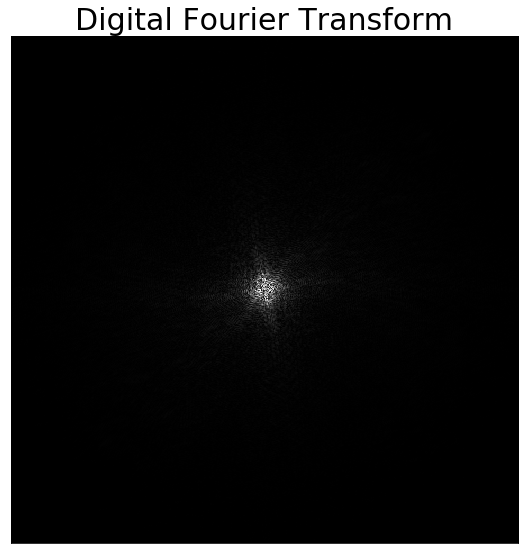

In [5]:
l1, l2, font, s1, s2, padding = 3.0, 10.0, 25.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)

plt.subplot(121), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title(''), plt.xticks([]), plt.yticks([])
plt.title('Digital Fourier Transform')

(Text(0.5,1,'Low Pass Frequency Spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

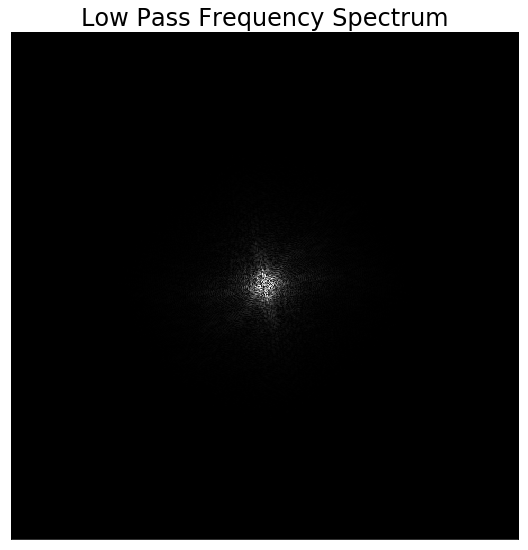

In [6]:
l1, l2, font, s1, s2, padding = 3.0, 10.0, 20.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)

plt.subplot(121), plt.imshow(plotftimgin, cmap = 'gray')
plt.title('Low Pass Frequency Spectrum'), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'High Pass Frequency Spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

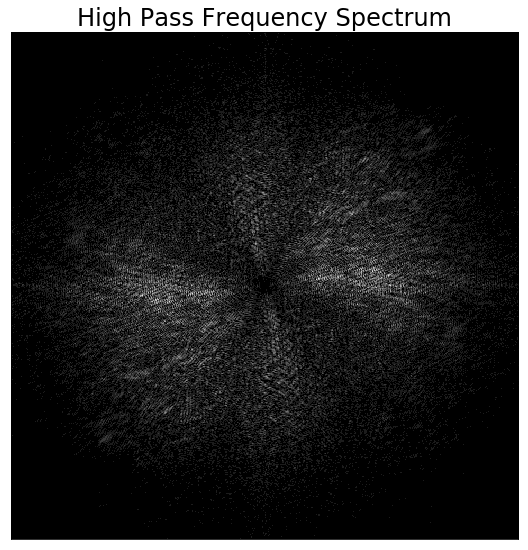

In [7]:
l1, l2, font, s1, s2, padding = 3.0, 10.0, 20.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)

plt.subplot(121), plt.imshow(plothpimgin, cmap = 'gray')
plt.title('High Pass Frequency Spectrum'), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'Digital Low Pass Reconstruction'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

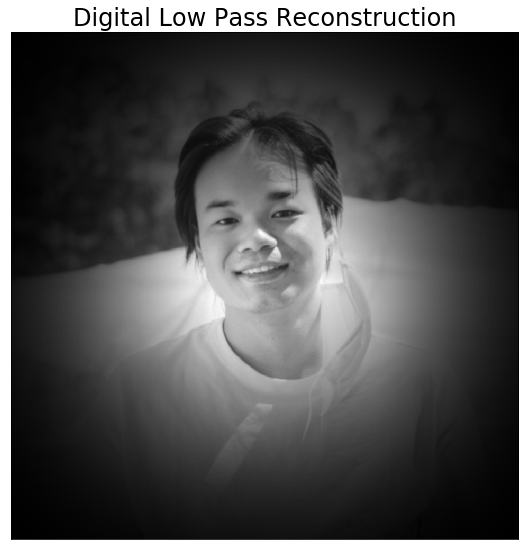

In [8]:
l1, l2, font, s1, s2, padding = 3.0, 10.0, 20.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)

plt.subplot(121), plt.imshow(plotimagep, cmap = 'gray')
plt.title('Digital Low Pass Reconstruction'), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'Digital High Pass Reconstruction'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

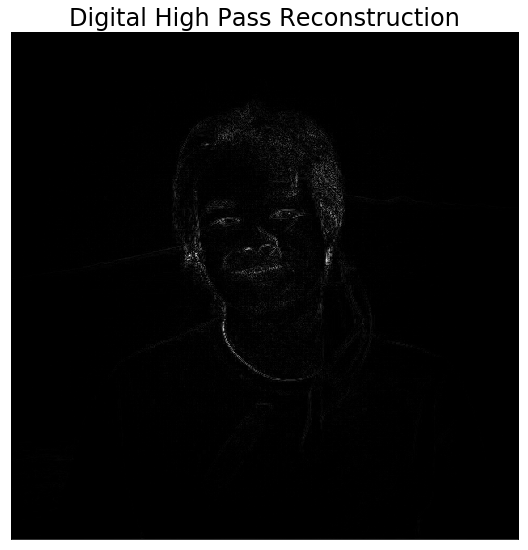

In [9]:
l1, l2, font, s1, s2, padding = 3.0, 10.0, 20.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)

plt.subplot(121), plt.imshow(plothpimagep, cmap = 'gray')
plt.title('Digital High Pass Reconstruction'), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'Observed High Pass Reconstruction'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

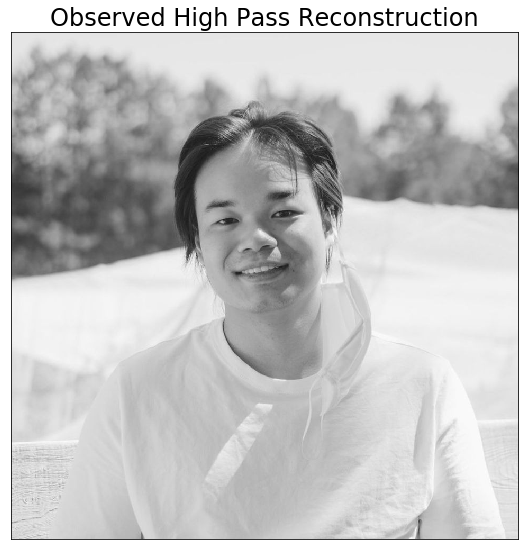

In [10]:
l1, l2, font, s1, s2, padding = 3.0, 10.0, 20.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)

plt.subplot(121), plt.imshow(np.asarray(labimhigh), cmap = 'gray')
plt.title('Observed High Pass Reconstruction'), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'Observed Low Pass Reconstruction'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

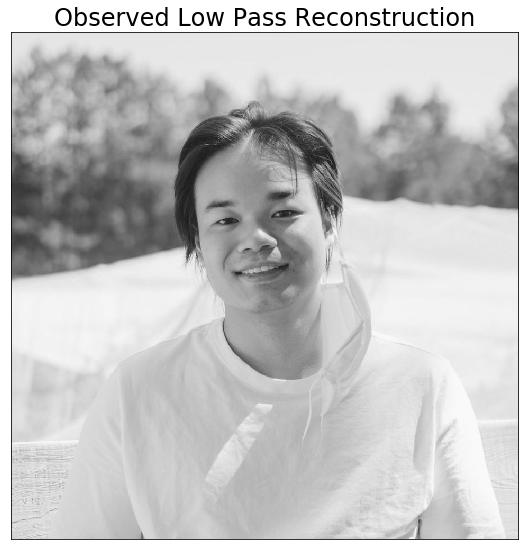

In [11]:
l1, l2, font, s1, s2, padding = 3.0, 10.0, 20.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)

plt.subplot(121), plt.imshow(np.asarray(labimlow), cmap = 'gray')
plt.title('Observed Low Pass Reconstruction'), plt.xticks([]), plt.yticks([])

960

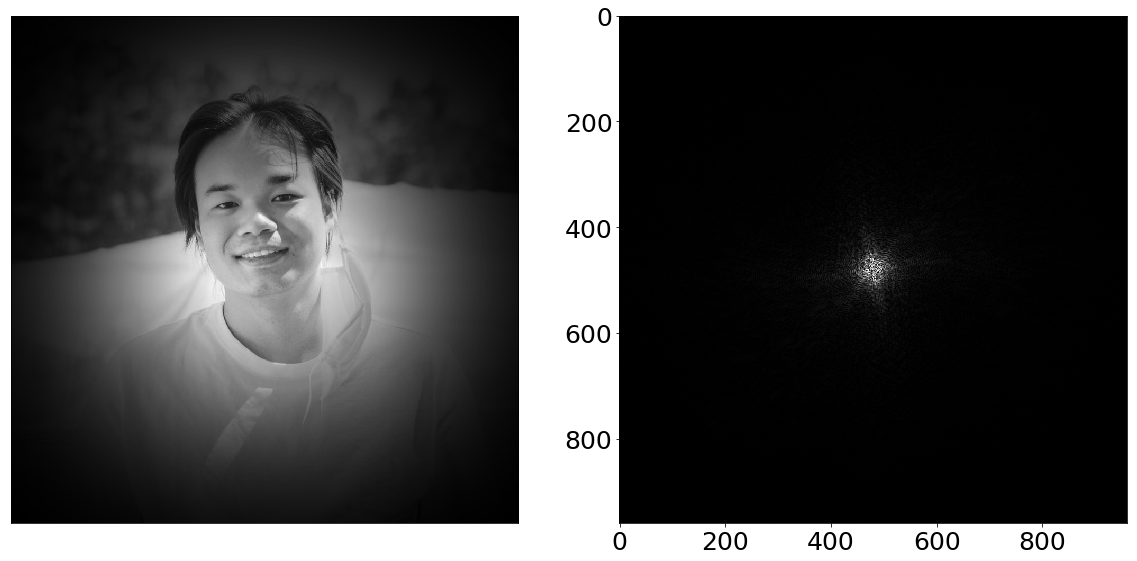

In [12]:
l1, l2, font, s1, s2, padding = 3.0, 10.0, 25.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)

plt.subplot(121), plt.imshow(multp, cmap = 'gray')
plt.title(''), plt.xticks([]), plt.yticks([])
# plt.title('Input Image')

plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
# plt.title(''), plt.xticks([]), plt.yticks([])
# plt.title('Magnitude Spectrum')
len(multp)

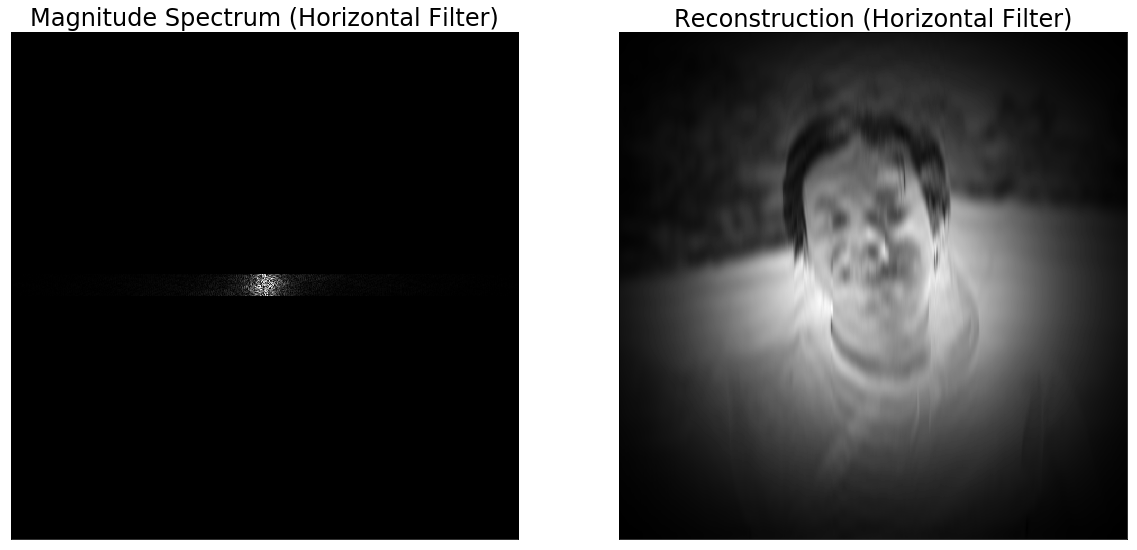

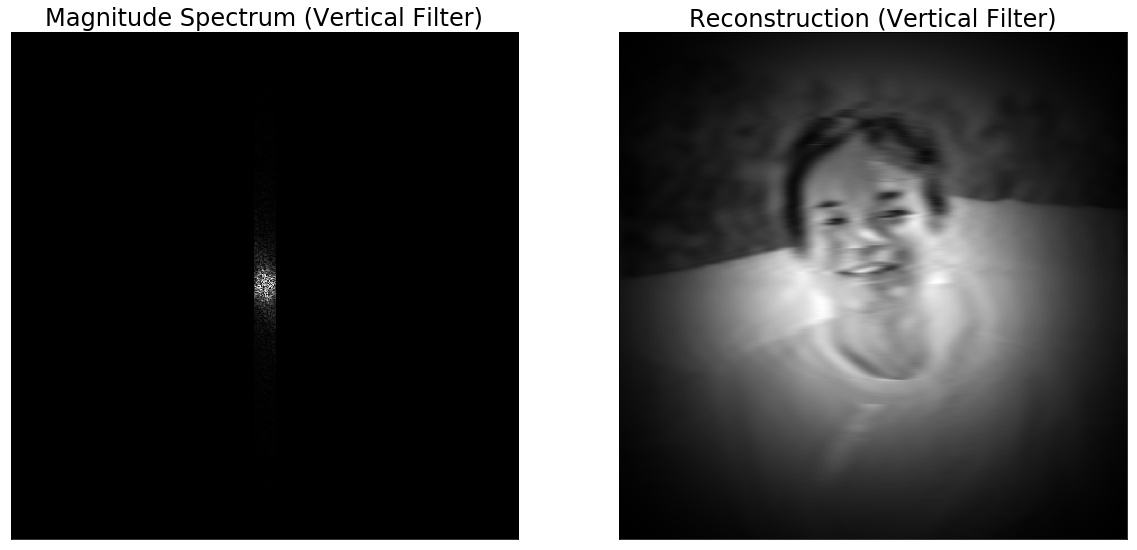

In [13]:
# myftimage = np.abs(fshift).astype(np.uint8)
myftimage = fshift

xcropsize1 = 960
ycropsize1 = 40

xcropsize2 = 40
ycropsize2 = 960

def crop_center(myimg,cropx,cropy):
    y,x = myimg.shape
#     startx = x//2-(cropx//2)
#     starty = y//2-(cropy//2)
    startx = x//2
    starty = y//2
    zeros = np.zeros((y, x),dtype=complex)
    edge_coords = (starty-cropy//2, startx-cropx//2)
    
    cropped = myimg[starty-cropy//2:starty+cropy//2,startx-cropx//2:startx+cropx//2]

    slicer = tuple(slice(edge, edge+i) for edge, i in zip(edge_coords, cropped.shape))
    zeros[slicer] = cropped
    return zeros

myftim1 = crop_center(myftimage, xcropsize1, ycropsize1)
myftimp1 = Image.fromarray(np.abs(myftim1).astype(np.uint8))

transformed1 = np.fft.ifft2(myftim1)
tfilteredp1 = np.abs(transformed1)

myftim2 = crop_center(myftimage, xcropsize2, ycropsize2)
myftimp2 = Image.fromarray(np.abs(myftim2).astype(np.uint8))

transformed2 = np.fft.ifft2(myftim2)
tfilteredp2 = np.abs(transformed2)


l1, l2, font, s1, s2, padding = 3.0, 10.0, 20.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)

plt.subplot(121), plt.imshow(np.asarray(myftimp1), cmap = 'gray')
plt.title('Magnitude Spectrum (Horizontal Filter)'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(tfilteredp1, cmap = 'gray')
plt.title('Reconstruction (Horizontal Filter)'), plt.xticks([]), plt.yticks([])
plt.show()

l1, l2, font, s1, s2, padding = 3.0, 10.0, 20.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)
    
plt.subplot(121), plt.imshow(np.asarray(myftimp2), cmap = 'gray')
plt.title('Magnitude Spectrum (Vertical Filter)'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(tfilteredp2, cmap = 'gray')
plt.title('Reconstruction (Vertical Filter)'), plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
test = np.fft.ifft2(myftim)

background00 = Image.new('L', im.size, color=0)
backgroundarr = np.asarray(background00)

ncols, nrows = (im.size[0], im.size[1])
polcy,polcx = nrows/2, ncols/2
polx = np.linspace(0, nrows, nrows)
poly = np.linspace(0, ncols, ncols)
polX, polY = np.meshgrid(polx, poly)
polarimgin = test*backgroundarr

polarimgin

testp = np.abs(test)
plt.subplot(122),plt.imshow(testp, cmap = 'gray')
###################

NameError: name 'myftim' is not defined

In [ ]:
plt.imshow(np.abs(fshift[0:15]))

In [ ]:
# l1, l2, font, s1, s2, padding = 3.0, 10.0, 25.0, 40.0, 20.0, 10.0
# fig = plt.figure('mydata', figsize = (s1,s2))
# plt.rcParams.update({'font.size': font})
# ax = fig.add_subplot(111)
# ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
# for axis in ['top', 'bottom', 'left', 'right']:
#     ax.spines[axis].set_linewidth(l1)
#     ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
#     ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)
    
# plt.imshow(plothpimagep, cmap='gray'), plt.xticks([]), plt.yticks([])
# plt.show()

In [ ]:
fshift[0][2]